# Análise do dataset EMPLOYEE's DATA

### Este conjunto de dados contém informações sobre os funcionários em diversas dimensões, oferecendo insights sobre a dinâmica da força de trabalho. Veja a seguir a descrição das colunas:

1. Educação: As qualificações educacionais dos funcionários.
2. Ano de Admissão: O ano em que os funcionários ingressaram na organização.
3. Cidade: A cidade onde os funcionários estão localizados.
4. Nível Salarial: O nível salarial dos funcionários.
5. Idade: A idade dos funcionários.
6. Sexo: O sexo dos funcionários.
7. Já Foi Alocado: Um indicador binário (0 ou 1) que indica se os funcionários já foram alocados a um projeto sem atividades ativas.
8. Experiência na Área Atual: O número de anos de experiência que os funcionários têm em sua área ou campo de atuação atual.
9. Deixou a Organização: Um indicador binário (0 ou 1) que indica se os funcionários deixaram a organização.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/Employee.csv', sep = ',')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [10]:
df.shape

(4653, 9)

In [2]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [11]:
df.corr(numeric_only=True)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


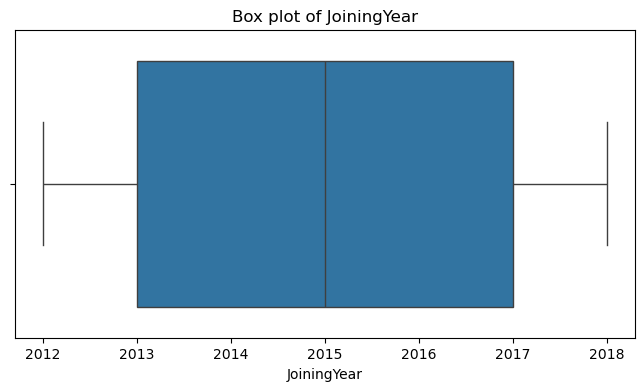

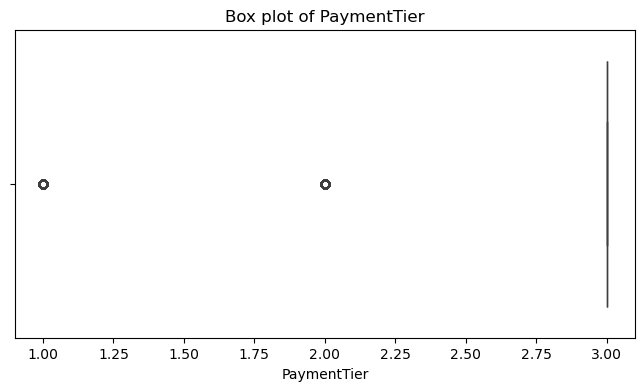

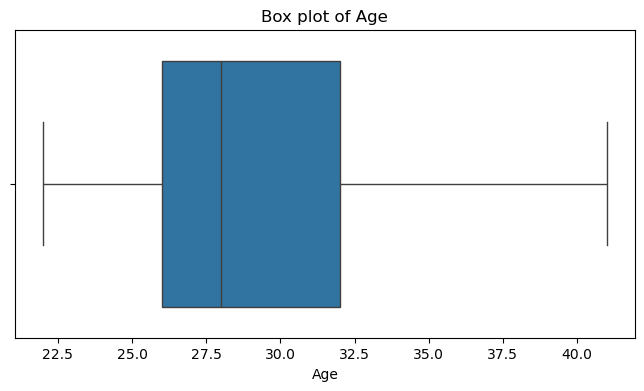

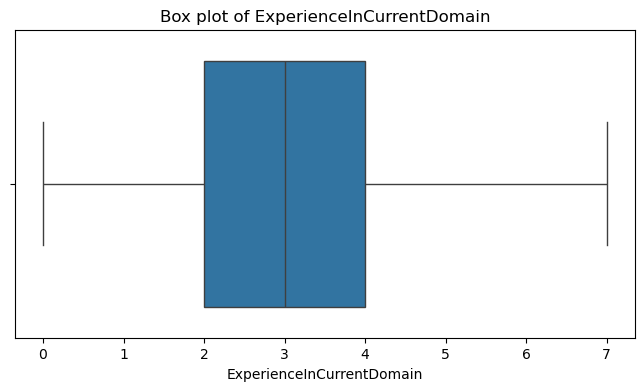

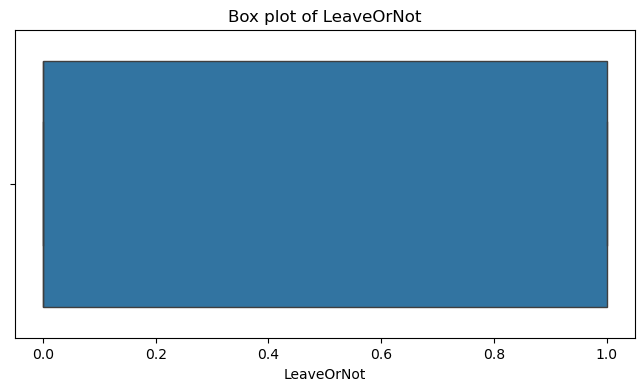

In [12]:
# Checking for outliers using box plots
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [13]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


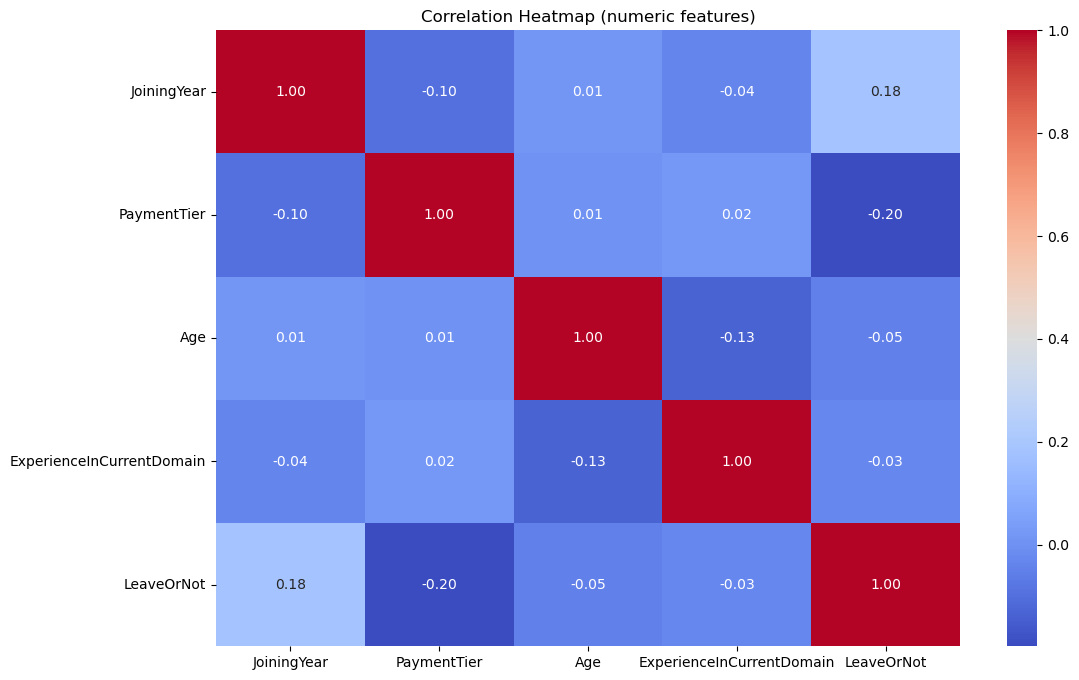

In [14]:
# Correlation heatmap (use only numeric columns to avoid conversion errors)
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (numeric features)')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Get dummy variables for categorical features
encoded_features = ['City','Gender','EverBenched']
df_encoded = pd.get_dummies(df_encoded, columns=encoded_features, drop_first=True)

# LabelEncoder apenas para variáveis ORDINAIS (com ordem)
# Ex: Education pode ter ordem: Bachelors < Masters < PHD
le_education = LabelEncoder()
df_encoded['Education'] = le_education.fit_transform(df_encoded['Education'])

df_encoded.head()

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,0,2017,3,34,0,0,False,False,True,False
1,0,2013,1,28,3,1,False,True,False,False
2,0,2014,3,38,2,0,True,False,False,False
3,1,2016,3,27,5,1,False,False,True,False
4,1,2017,3,24,2,1,False,True,True,True


In [16]:
# Separating features and target variable for modeling if employee will leave or not
X = df_encoded.drop('LeaveOrNot', axis=1)
y = df_encoded['LeaveOrNot']

In [17]:
# Separar dados para treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Escalonar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit + transform no treino
X_test_scaled = scaler.transform(X_test)        # apenas transform no teste

In [19]:
# Criar e treinar um modelo de regressão logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
# Avaliar o modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       920
           1       0.68      0.42      0.52       476

    accuracy                           0.74      1396
   macro avg       0.72      0.66      0.67      1396
weighted avg       0.73      0.74      0.72      1396

Confusion Matrix:
[[827  93]
 [275 201]]


In [21]:
# Criar e treinar um modelo naive bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [22]:
# Avaliar o modelo naive bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       920
           1       0.56      0.51      0.54       476

    accuracy                           0.70      1396
   macro avg       0.66      0.65      0.66      1396
weighted avg       0.69      0.70      0.70      1396

Confusion Matrix:
[[732 188]
 [232 244]]


In [23]:
# Criar um modelo de floresta aleatória
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Avaliar o model random forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       920
           1       0.82      0.71      0.76       476

    accuracy                           0.85      1396
   macro avg       0.84      0.82      0.83      1396
weighted avg       0.85      0.85      0.85      1396

Confusion Matrix:
[[847  73]
 [138 338]]


In [25]:
# Criar modelo SVM
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

SVC()

In [26]:
# Avaliar modelo SVM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       920
           1       0.91      0.60      0.72       476

    accuracy                           0.84      1396
   macro avg       0.86      0.78      0.81      1396
weighted avg       0.85      0.84      0.83      1396

Confusion Matrix:
[[890  30]
 [190 286]]
